## Degue vs Environmental Analysis.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check version
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.2.5
numpy version: 1.20.2
seaborn version: 0.11.1
sklearn version: 0.24.2


### Input Data from CSV file.

In [3]:
# Read in Data set
df= pd.read_csv('../../Nattawat/dengue_preprocessing.csv',header= 0,encoding= 'unicode_escape')

In [4]:
df = df.drop(columns=['province', 'year'])

In [5]:
df = df.loc[df['year_num'] == 4]
df

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
231,4,1,145,1474.1,80.1,38.8,20.0,27.40,1,0.05,1943
232,4,2,95,1058.1,72.9,40.0,17.7,29.50,10,0.21,4773
233,4,3,87,687.4,67.2,42.5,14.1,29.30,1,0.04,2554
234,4,4,98,1299.6,75.0,41.4,10.0,27.80,0,0.00,1971
235,4,5,100,1041.7,70.1,42.0,11.4,28.60,0,0.00,938
...,...,...,...,...,...,...,...,...,...,...,...
303,4,73,95,1024.0,69.3,40.6,9.9,25.25,0,0.00,1264
304,4,74,106,1285.7,69.6,42.5,8.5,27.90,3,0.12,2475
305,4,75,77,842.8,67.5,43.0,13.0,28.80,1,0.15,646
306,4,76,94,975.4,71.4,42.5,12.4,29.30,0,0.00,1004


In [6]:
df.describe()

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,77.0,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,4.0,39.000000,108.636364,1301.261039,73.259740,40.101299,14.240260,28.282468,1.597403,0.102078,1902.597403
std,0.0,22.371857,27.950572,765.743855,4.465931,2.231149,4.499481,0.880108,2.249326,0.140013,1643.994640
min,4.0,1.000000,75.000000,513.200000,63.900000,35.000000,0.600000,25.250000,0.000000,0.000000,229.000000
25%,4.0,20.000000,91.000000,855.100000,69.700000,38.700000,10.800000,27.700000,0.000000,0.000000,814.000000
50%,4.0,39.000000,97.000000,1058.100000,72.900000,40.500000,14.100000,28.400000,1.000000,0.060000,1514.000000
75%,4.0,58.000000,114.000000,1474.100000,76.200000,41.900000,17.700000,29.000000,2.000000,0.150000,2237.000000
max,4.0,77.000000,185.000000,5287.300000,83.700000,43.400000,23.200000,29.700000,10.000000,0.870000,8279.000000


In [7]:
df.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [8]:
# Transformation
df_num  = df[['day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg',]]

In [9]:
# Choice of Numerical varialable.

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Version1: select MinMax

num_column = df_num.dtypes[df_num.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

std_transform_feat = pd.DataFrame(data = df_num)
std_transform_feat[num_column] = scaler.fit_transform(df_num[num_column])

# Show an example of a record with scaling applied
display(std_transform_feat.tail())

,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg
303,0.181818,0.106994,0.272727,0.666667,0.411504,0.000000
304,0.281818,0.161811,0.287879,0.892857,0.349558,0.595506
305,0.018182,0.069039,0.181818,0.952381,0.548673,0.797753
306,0.172727,0.096814,0.378788,0.892857,0.522124,0.910112
307,0.300000,0.248110,0.232323,0.666667,0.579646,0.730337


In [11]:
# log transform to target variable impove RMSE value.

#df['patient'] = np.log(df['patient'])

In [12]:
df_cat = df[['year_num', 'province_num']]
y_tar = df[['patient']]

In [13]:
# Concat all numerical feature to DataFrame
df_pre = pd.concat((df_cat, std_transform_feat,y_tar),axis=1)

In [14]:
df_pre.describe().round(2)

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,patient
count,77.0,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,4.0,39.00,0.31,0.17,0.47,0.61,0.60,0.68,1902.60
std,0.0,22.37,0.25,0.16,0.23,0.27,0.20,0.20,1643.99
min,4.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,229.00
25%,4.0,20.00,0.15,0.07,0.29,0.44,0.45,0.55,814.00
50%,4.0,39.00,0.20,0.11,0.45,0.65,0.60,0.71,1514.00
75%,4.0,58.00,0.35,0.20,0.62,0.82,0.76,0.84,2237.00
max,4.0,77.00,1.00,1.00,1.00,1.00,1.00,1.00,8279.00


# Building Linear Regression Model

1. Selecting features for Polynomial Regression Model
2. Train Test Split or CV
3. Creating and Training the Model
4. Model Evaluation


## Selecting features for Polynomial Regression Model

In [15]:
df_pre.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'patient'],
      dtype='object')

In [16]:
X = df_pre[[ 'day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg']]
y = df_pre['patient']

## Train Test Split

This step we will separate data to train (training set) and test (testing set)
* training set use for train model 
* testing set use for  test model or call that Evaluation 


In [17]:
from sklearn.model_selection import train_test_split

# Train dataset X0% and Test dataset X0%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=1)

In [18]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

## Creating and Training the Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)

In [20]:
# Try to use simple model: Linear Regression.
model = LinearRegression().fit(X_train_poly, y_train)

## Model Evaluation

evaluate model by visit coefficients of each item

In [21]:
r_sq = model.score(X_train_poly, y_train)
print('coefficient of determination(R_squar_score):', r_sq)

coefficient of determination(R_squar_score): 0.48845841302989557


In [22]:
print('intercept:', model.intercept_)

intercept: 32407.568036173354


## Predictions from our Model

In [23]:
# Predicting 
predictions = model.predict(X_test_poly)

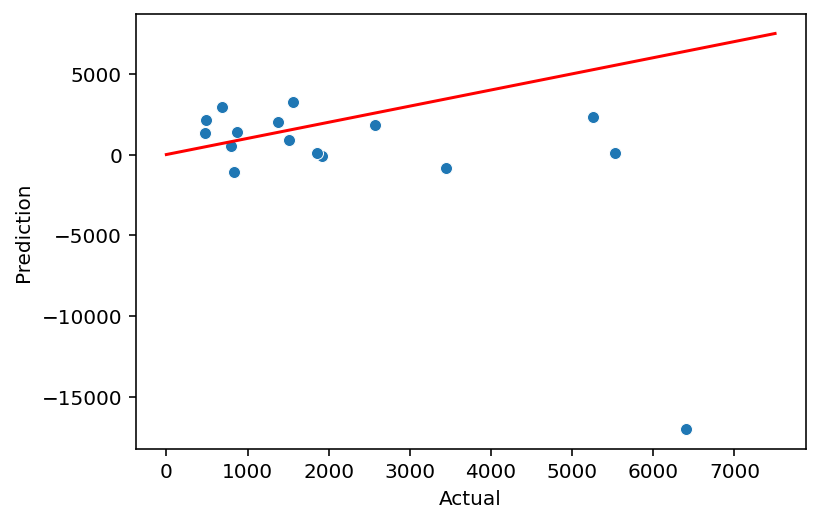

In [24]:
# plot predictions against actual

plot_k = sns.scatterplot(y_test,predictions)
plot_k.set(xlabel='Actual', ylabel='Prediction')

# generate and graph y = x line
x_plot = np.linspace(0,7500,10000)
y_plot = x_plot

plt.plot(x_plot, y_plot, color='r')
plt.show()

# Simulate linear line

## Prediction

### Actual value and the predicted value

In [25]:
# Province 
province = pd.Series(['Pattalung','Nakornsrithamarat','Pang-Nga','Surin','Rayong','Prachinburi','Udonthani','Songkhla',
           'Lamphoon','Nongbualamphu','Samutsongkram','Nakornrachasrima','Ubonrachathani','Kanjanaburi',
           'Trang','Nakornprathom','Nakornprathom','Narathiwat','Amnajcharean','Singburi','Pattalung'])
pv = pd.DataFrame(province, columns=["Province"])

In [26]:
# Years 2016-2020
year = pd.Series(['2016','2020','2019','2019','2020','2017','2018','2017','2017','2016','2018','2016','2020','2020',
                  '2020','2017','2018','2017','2020','2020','2017'])
years = pd.DataFrame(year, columns=["Year"])

In [27]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})

In [28]:
# Show 21 samples to compare Actual value and the predicted value
result = pd.concat([pv,years,mlr_diff],axis=1)
result.head(21)

,Province,Year,Actual value,Predicted value
0,Pattalung,2016,6398.0,-16993.352767
1,Nakornsrithamarat,2020,2577.0,1843.317103
2,Pang-Nga,2019,1371.0,2018.325752
3,Surin,2019,833.0,-1069.638444
4,Rayong,2020,5523.0,123.465226
5,Prachinburi,2017,793.0,524.935419
6,Udonthani,2018,1919.0,-94.908901
7,Songkhla,2017,690.0,2952.353297
8,Lamphoon,2017,3441.0,-863.464336
9,Nongbualamphu,2016,5255.0,2345.486467


**Residual Histogram**

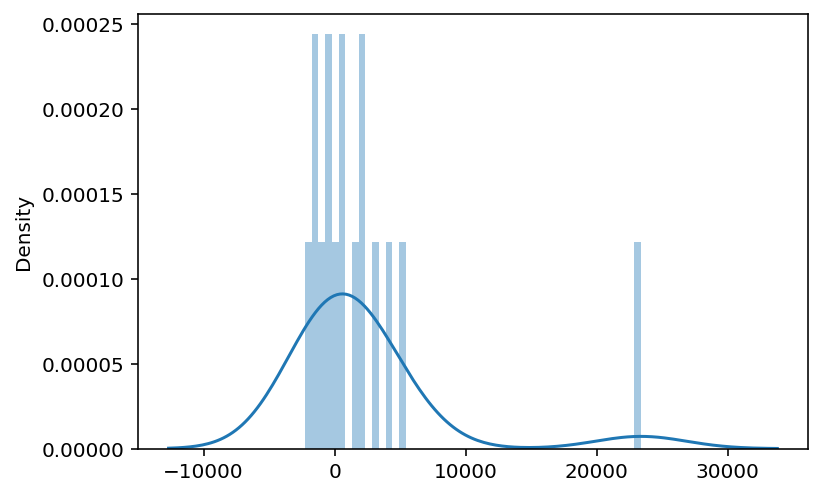

In [29]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [30]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('R squared of Training Set: {:.2f}'.format(model.score(X_train_poly,y_train)))
print('R squared of Test Set: {:.2f}'.format(model.score(X_test_poly,y_test)))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

R squared of Training Set: 0.49
R squared of Test Set: -10.36
Mean Absolute Error (MAE): 3187.7171
Root Mean Squared Error (RMSE): 6261.7406
